<a href="https://colab.research.google.com/github/DiegoVialle/Data-Science---Introducao-a-testes-estatisticos-com-python/blob/master/Data_Science_Introdu%C3%A7%C3%A3o_a_Testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

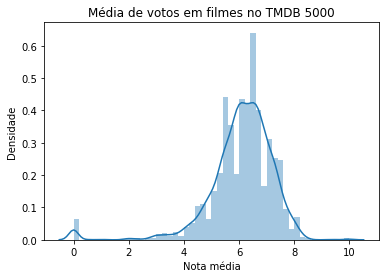

In [10]:
import seaborn as sns

ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel = "Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000")


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

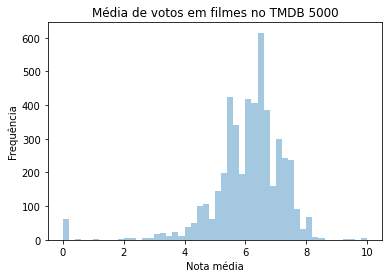

In [13]:
ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set(xlabel = "Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

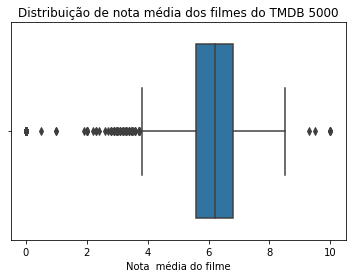

In [16]:
ax = sns.boxplot(tmdb.vote_average)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000')

Detectamos que alguns filmes tiveram poucos votos (ou até mesmo nenhum voto). Decidimos que esses filmes não devem pertencer a nossa análise.

In [17]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000 dentre os filmes com mais de 9 votos')

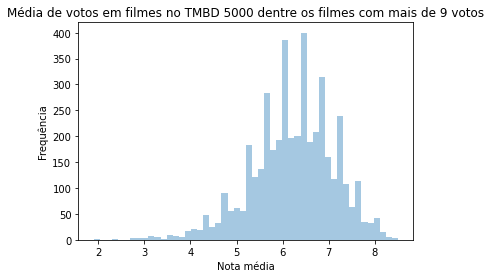

In [21]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist= False, kde= False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMBD 5000 dentre os filmes com mais de 9 votos')

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000 dentre os filmes com mais de 9 votos')

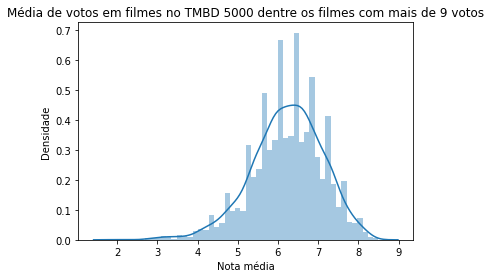

In [22]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMBD 5000 dentre os filmes com mais de 9 votos')

Analisaremos tambem o movielens

In [24]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

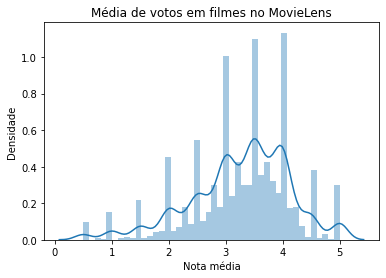

In [26]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no MovieLens')

In [27]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
quantidade_de_votos_por_filme.query("rating >= 10")

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
5,49,49,49
6,102,102,102
...,...,...,...
174055,13,13,13
176371,18,18,18
177765,13,13,13


In [38]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [29]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100k com 10 ou mais votos')

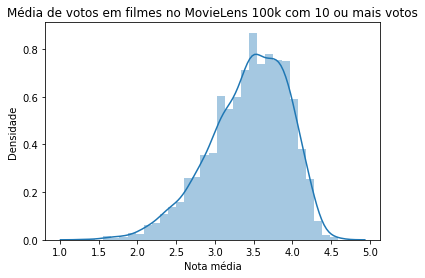

In [40]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no MovieLens 100k com 10 ou mais votos')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes no MovieLens 100k com 10 ou mais votos')

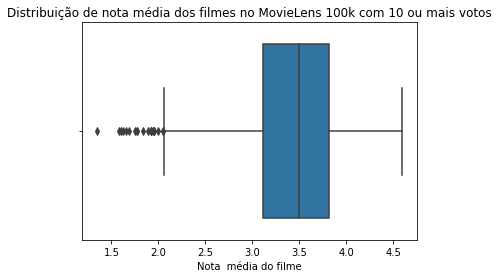

In [41]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes no MovieLens 100k com 10 ou mais votos')

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

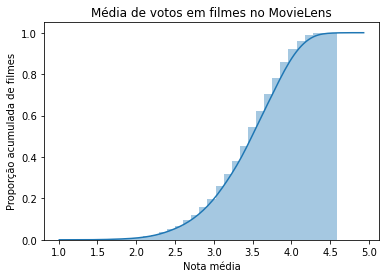

In [42]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de filmes')
ax.set_title('Média de votos em filmes no MovieLens')

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

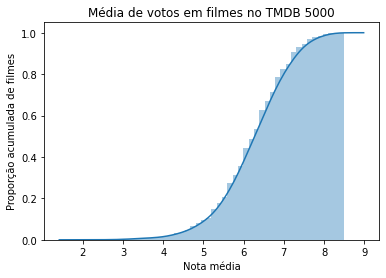

In [43]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de filmes')
ax.set_title('Média de votos em filmes no TMDB 5000')

# Analisando a distribuição dos dados capturados de outros campos do TMDB

Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

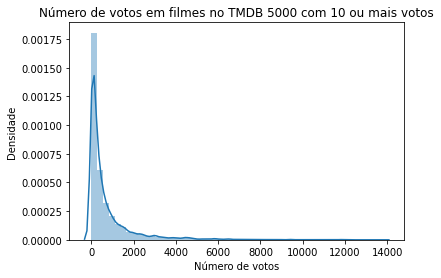

In [44]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Número de votos', ylabel='Densidade')
ax.set_title('Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

Text(0.5, 1.0, 'Gastos em filmes no TMDB 5000')

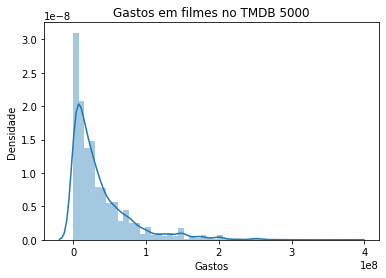

In [45]:
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel='Gastos', ylabel='Densidade')
ax.set_title('Gastos em filmes no TMDB 5000')

In [46]:
tmdb.query("popularity == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5000')

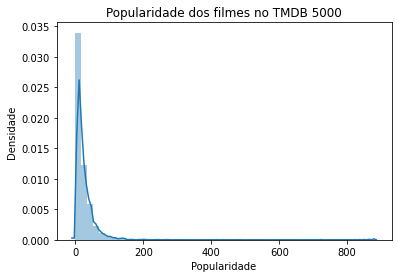

In [47]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

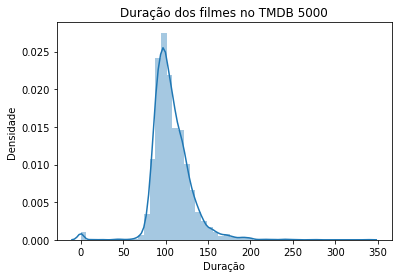

In [48]:
ax = sns.distplot(tmdb.runtime.dropna())
ax.set(xlabel='Duração', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

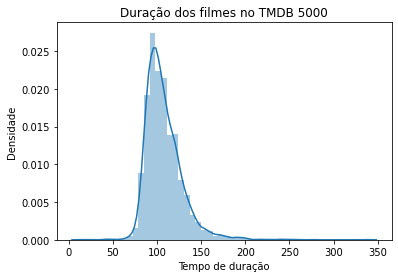

In [49]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna())
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

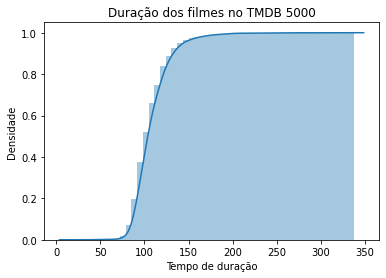

In [50]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                 hist_kws={'cumulative':True},
                 kde_kws={'cumulative':True})
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

In [51]:
tmdb.query("runtime>0").runtime.dropna().quantile(q=0.8)

121.0